In [1]:
#importing all the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

#importing gender guesser
%pip install gender_guesser
import gender_guesser.detector as gender

#importing all the sklearn and stat model packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf

#importing the sklearn packages for classification model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#loading the dataset
file1 = "/Users/kyloren/Downloads/GOT_character_predictions.xlsx"

GOT_df = pd.read_excel(io         = file1,
                       header     = 0,
                       sheet_name = 0)

# setting random seed
rand.seed(a = 327)

#Setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',100)

#displaying first 5 rows of the dataset
GOT_df.head(n = 10)

Note: you may need to restart the kernel to use updated packages.


S.No                  name                 title   culture  dateOfBirth              mother            father                heir            house               spouse  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble   age  numDeadRelations  popularity  isAlive
0     1  Viserys II Targaryen                   NaN       NaN          NaN  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen              NaN                  NaN                        0                       0                        0                        0                           0            1.0            0.0          0.0            NaN          0        0   NaN                11    0.605351        0
1     2           Walder Frey  Lord of the Crossing  Rivermen        208.0                 NaN               NaN                 NaN       House Frey          Perra Royce                        1                       1                        1                        1                           1            NaN            NaN          NaN            1.0          1        1  97.0                 1    0.896321        1
2     3          Addison Hill                   Ser       NaN          NaN                 NaN               NaN                 NaN      House Swyft                  NaN                        0                       0                        0                        1                           0            NaN            NaN          NaN            NaN          0        1   NaN                 0    0.267559        1
3     4           Aemma Arryn                 Queen       NaN         82.0                 NaN               NaN                 NaN      House Arryn  Viserys I Targaryen                        0                       0                        0                        0                           0            NaN            NaN          NaN            0.0          1        1  23.0                 0    0.183946        0
4     5        Sylva Santagar            Greenstone   Dornish        276.0                 NaN               NaN                 NaN   House Santagar      Eldon Estermont                        0                       0                        0                        1                           0            NaN            NaN          NaN            1.0          1        1  29.0                 0    0.043478        1
5     6      Tommen Baratheon                   NaN       NaN          NaN    Cersei Lannister  Robert Baratheon  Myrcella Baratheon              NaN                  NaN                        0                       0                        0                        0                           0            1.0            1.0          1.0            NaN          0        0   NaN                 5    1.000000        1
6     7      Valarr Targaryen      Hand of the King  Valyrian        183.0                 NaN               NaN                 NaN  House Targaryen      Kiera of Tyrosh                        0                       0                        0                        0                           0            NaN            NaN          NaN            1.0          1        1  26.0                 0    0.431438        0
7     8   Viserys I Targaryen                   NaN       NaN          NaN    Alyssa Targaryen  Baelon Targaryen  Rhaenyra Targaryen              NaN                  NaN                        0                       0                        0                        0                           0            1.0            1.0          1.0            NaN          0        0   NaN                 5    0.678930        0
8     9               Wilbert                   Ser       NaN          NaN                 NaN               NaN                 NaN              NaN                  NaN                        0                   

In [2]:
#Checking for the number of missing values in the dataset
GOT_df.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [3]:
#Retriving the Game of Thrones dataset information
GOT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [4]:
#loading the data dictionary from source
file2 = "/Users/kyloren/Downloads/GOT_data_dictionary.xlsx" 

GOT_df_dict = pd.read_excel(io         = file2,
                                header     = 0,
                                sheet_name = 0)

#Showing the dictionary for the Game of Thrones dataset
GOT_df_dict

S.No                                                            Character number (by order of appearance)
0                         name                                                                                       Character name
1                        title                                                            Honorary title(s) given to each character
2                         male                                                                                 1 = male, 0 = female
3                      culture                                                          Indicates the cultural group of a character
4                  dateOfBirth                                        Known dates of birth for each character (measurement unknown)
5                       mother                                                                        Character's biological mother
6                       father                                                                        Character's biological father
7                         heir                                                                          Character's biological heir
8                        house                               Indicates a character's allegiance to a house (i.e. a powerful family)
9                       spouse                                                                                Character's spouse(s)
10     book1_A_Game_Of_Thrones                                                     1 = appeared in book, 0 = did not appear in book
11      book2_A_Clash_Of_Kings                                                     1 = appeared in book, 0 = did not appear in book
12     book3_A_Storm_Of_Swords                                                     1 = appeared in book, 0 = did not appear in book
13     book4_A_Feast_For_Crows                                                     1 = appeared in book, 0 = did not appear in book
14  book5_A_Dance_with_Dragons                                                     1 = appeared in book, 0 = did not appear in book
15               isAliveMother                                                                             1 = alive, 0 = not alive
16               isAliveFather                                                                             1 = alive, 0 = not alive
17                 isAliveHeir                                                                             1 = alive, 0 = not alive
18               isAliveSpouse                                                                             1 = alive, 0 = not alive
19                   isMarried                                                                         1 = married, 0 = not married
20                     isNoble                                                                             1 = noble, 0 = not noble
21                         age                                                                             Character's age in years
22            numDeadRelations                                       Total number of deceased relatives throughout all of the books
23                  popularity  Indicates the popularity of a character (1 = extremely popular (max), 0 = extremely unpopular (m...
24                     isAlive                                                                             1 = alive, 0 = not alive

In [5]:
#Looking at the missing values
GOT_df.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [6]:
#Analysing the available title column values to check if there are any duplicates
GOT_df.loc[: ,'title'].value_counts()

Ser                                                            384
Maester                                                         39
Archmaester                                                     21
Lord                                                            20
Septon                                                          18
Winterfell                                                      17
Princess                                                        16
Lady                                                            12
Septa                                                           10
Prince                                                           9
Lord Commander of the Night's Watch                              9
King in the North                                                9
Cupbearer                                                        8
Grand Maester                                                    8
Khal                                                          

In [7]:
# Using this code sourced from script 6
# User-defined functions

#function for missing value flagger

def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



# text_split_feature

def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [8]:
#running the missing value flagger function to create columns for missing values
GOT_df_translated = mv_flagger(df = GOT_df)

#retrieving the columns
GOT_df_translated.columns


Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age'], dtype='object')

In [9]:
#Running Pearson correlation method

GOT_df_corr = GOT_df.corr(method = "pearson").round(decimals = 2)

GOT_df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
isAliveHeir                   0.38
book4_A_Feast_For_Crows       0.27
isAliveFather                 0.20
isAliveSpouse                 0.17
m_age                         0.15
m_dateOfBirth                 0.15
m_father                      0.14
m_mother                      0.14
m_isAliveFather               0.14
m_isAliveMother               0.14
m_isAliveHeir                 0.13
m_heir                        0.13
age                           0.09
m_isAliveSpouse               0.05
m_spouse                      0.05
m_title                       0.04
m_culture                     0.04
m_house                       0.04
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isNoble                      -0.04
isAliveMother                -0.04
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
dateOfBirth                  -0.09
S.No                         -0.13
book1_A_Game_Of_Thrones      -0.15
popularity          

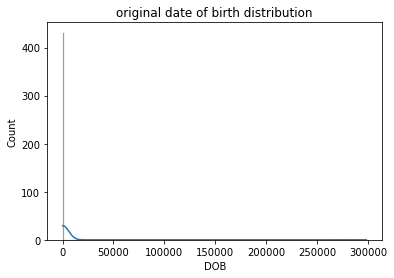

In [10]:
# developing histograms for numerical variables to check for skewness
sns.histplot(data   = GOT_df,
             x      = 'dateOfBirth',
             kde    = True,
             binwidth= 1000)

#.set(ylim   = (0))

# title and axis labels
plt.title(label   = "original date of birth distribution")
plt.xlabel(xlabel = "DOB") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

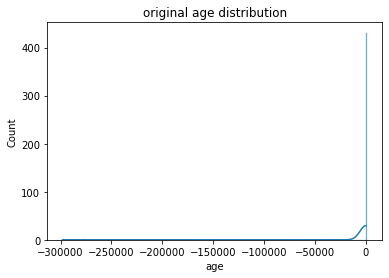

In [11]:
sns.histplot(data   = GOT_df,
             x      = 'age',
             kde    = True,
             binwidth= 1000)


# title and axis labels
plt.title(label   = "original age distribution")
plt.xlabel(xlabel = "age") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [12]:
# For age - imputing missing values
i_age = GOT_df_translated['age'].median()
GOT_df_translated['age'] = GOT_df_translated['age'].fillna(i_age)


# checking the results
GOT_df_translated['age'].isnull().sum(axis = 0)

0

In [13]:
# For date of birth - imputing missing values
i_dob = GOT_df_translated['dateOfBirth'].median()
GOT_df_translated['dateOfBirth'] = GOT_df_translated['dateOfBirth'].fillna(i_dob)


# checking the results
GOT_df_translated['dateOfBirth'].isnull().sum(axis = 0)

0

In [14]:
#Analysing the trend for culture varaible to check for any duplications and segregating according to similarity
GOT_df_translated['culture'].value_counts()

Northmen                   124
Ironborn                   112
Free Folk                   51
Valyrian                    43
Braavosi                    42
Ghiscari                    25
Dornish                     25
Dothraki                    23
Rivermen                    19
Valemen                     19
Reach                       16
Vale mountain clans         15
Dornishmen                  14
Westeros                    12
Free folk                   11
northmen                     9
Westerman                    9
Stormlands                   7
Tyroshi                      7
Qartheen                     6
Ironmen                      5
Summer Isles                 5
Northern mountain clans      5
Lysene                       4
Westermen                    4
Crannogmen                   4
Astapori                     4
Pentoshi                     3
Meereenese                   3
First Men                    3
Lyseni                       3
Myrish                       3
Wildling

In [15]:
#Grouping for cultures with duplicates and similarity
cultures_sum = {'Northmen': ['Northmen','northmen'],
                'Ironborn': ['Ironborn','Ironmen','ironborn'],
                'Freefolk': ['Free Folk','Free folk','free folk','Wildling','First Men','Wildlings'],
                'Qarth': ['Qartheen','Qarth'],
                'Braavosi': ['Braavosi','Braavos'],
                'Ghiscari': ['Ghiscari', 'Ghiscaricari'],
                'Dornish': ['Dornish','Dornishmen','Dorne'],
                'Riverlands': ['Rivermen','Riverlands'],
                'Vale': ['Valemen','Vale mountain clans','Vale'],
                'Meereen': ['Meereen','Meereenese'],
                'Reach': ['Reach','Reachmen','The Reach'],
                'Westerman': ['Westerman','Westermen','westermen','Westerlands'],
                'Stormlander':['Stormlands','Stormlander'],
                'Lysene':['Lysene','Lyseni'],
                'Asshai':['Asshai',"Asshai'i"],
                'SummerIslanders': ['Summer Islands','Summer Islander','Summer Isles'],
                'Andals':['Andals','Andal'],
                'Norvoshi':['Norvos','Norvoshi'],
                'Lhazareen':['Lhazareen','Lhazarene'],
                'Others':['Northern mountain clans','Crannogmen','Astapori',
                          'Pentoshi','Myrish','Sistermen','Qohor','Astapor',
                          'Rhoynar','Naathi','Ibbenese']}

#translating values and updating the same in dataframe

for cultures in cultures_sum:
    GOT_df_translated.loc[GOT_df_translated.culture.isin(values = cultures_sum[cultures]), 'culture'] = cultures

GOT_df_translated['culture'].value_counts()

Northmen           133
Ironborn           118
Freefolk            70
Valyrian            43
Braavosi            43
Dornish             41
Vale                35
Others              27
Ghiscari            26
Dothraki            23
Riverlands          21
Reach               18
Westerman           17
Westeros            12
Stormlander          8
Tyroshi              7
Lysene               7
Qarth                7
SummerIslanders      7
Meereen              4
Lhazareen            3
Asshai               3
Norvoshi             2
Andals               2
Name: culture, dtype: int64

In [16]:
# imputing missing values with unkown

GOT_df_translated['title']   = GOT_df_translated['title'].fillna('Unknown')
GOT_df_translated['mother']  = GOT_df_translated['mother'].fillna('Unknown')
GOT_df_translated['father']  = GOT_df_translated['father'].fillna('Unknown')
GOT_df_translated['spouse']  = GOT_df_translated['spouse'].fillna('Unknown')
GOT_df_translated['heir']    = GOT_df_translated['heir'].fillna('Unknown')
GOT_df_translated['culture'] = GOT_df_translated['culture'].fillna('Unknown')

# checking the results
GOT_df_translated.isnull().sum(axis = 0)

S.No                             0
name                             0
title                            0
culture                          0
dateOfBirth                      0
mother                           0
father                           0
heir                             0
house                          427
spouse                           0
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                              0
numDeadRelations                 0
popularity                       0
isAlive                          0
m_title                          0
m_culture                        0
m_dateOfBirth                    0
m_mother            

In [17]:
# imputing missing values with '0'

fill = 0

GOT_df_translated['isAliveMother']   = GOT_df_translated['isAliveMother'].fillna(fill)
GOT_df_translated['isAliveFather'] = GOT_df_translated['isAliveFather'].fillna(fill)
GOT_df_translated['isAliveSpouse']  = GOT_df_translated['isAliveSpouse'].fillna(fill)
GOT_df_translated['isAliveHeir']  = GOT_df_translated['isAliveHeir'].fillna(fill)


# checking the results
GOT_df_translated.isnull().sum(axis = 0)

S.No                            0
name                            0
title                           0
culture                         0
dateOfBirth                     0
mother                          0
father                          0
heir                            0
house                         427
spouse                          0
book1_A_Game_Of_Thrones         0
book2_A_Clash_Of_Kings          0
book3_A_Storm_Of_Swords         0
book4_A_Feast_For_Crows         0
book5_A_Dance_with_Dragons      0
isAliveMother                   0
isAliveFather                   0
isAliveHeir                     0
isAliveSpouse                   0
isMarried                       0
isNoble                         0
age                             0
numDeadRelations                0
popularity                      0
isAlive                         0
m_title                         0
m_culture                       0
m_dateOfBirth                   0
m_mother                        0
m_father      

In [18]:
text_split_feature(col= 'name', 
                   df= GOT_df_translated, 
                   sep=' ', 
                   new_col_name='number_of_names')

# checking results
GOT_df_translated['number_of_names'].value_counts(normalize = False,
                                        sort      = False,
                                        ascending = False).sort_index()

1     591
2    1201
3      98
4       9
5      35
6      12
Name: number_of_names, dtype: int64

In [19]:
#adding the age and date of birth in order for feature engineering the available features

GOT_df_translated['age_dob'] = GOT_df_translated['age'] + GOT_df_translated['dateOfBirth']

GOT_df_translated.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age', 'number_of_names', 'age_dob'], dtype='object')

In [20]:
# installing gender guesser for dataset
%pip install gender_guesser

Note: you may need to restart the kernel to use updated packages.


In [21]:
# STEP 1: splitting name to get the lastname

# placeholder list
placeholder_lst = []


# looping over each email address
for index, col in GOT_df_translated.iterrows():
    
    # splitting name at ' '
    name_split = GOT_df_translated.loc[index, 'name'].split(sep = ' ')

    #Added this to reverse the order of words 
    surname = list(reversed(name_split))
    
    # appending placeholder_lst with the results
    placeholder_lst.append(surname)
    

# converting placeholder_lst into a DataFrame 
GOT_df_n = pd.DataFrame(placeholder_lst)


# displaying the results
GOT_df_n.head(n = 20)

0        1        2     3     4     5
0     Targaryen       II  Viserys  None  None  None
1          Frey   Walder     None  None  None  None
2          Hill  Addison     None  None  None  None
3         Arryn    Aemma     None  None  None  None
4      Santagar    Sylva     None  None  None  None
5     Baratheon   Tommen     None  None  None  None
6     Targaryen   Valarr     None  None  None  None
7     Targaryen        I  Viserys  None  None  None
8       Wilbert     None     None  None  None  None
9        Osgrey  Wilbert     None  None  None  None
10         Will     None     None  None  None  None
11     (orphan)     Will     None  None  None  None
12     (squire)     Will     None  None  None  None
13  (Standfast)     Will     None  None  None  None
14       (Treb)     Will     None  None  None  None
15       Humble     Will     None  None  None  None
16       Willam     None     None  None  None  None
17        Wylde   Willem     None  None  None  None
18     Willifer     None     None  None  None  None
19       Willit     None     None  None  None  None

In [22]:
# renaming column to concatenate
GOT_df_n.columns = ['lastname' , 'middlename', 'firstname', 'value1', 'value2', 'value3']


# concatenating personal_email_domain with friends DataFrame
GOT_df_translated = pd.concat([GOT_df_translated, GOT_df_n['lastname']],
                   axis = 1)


# printing value counts of personal_email_domain
GOT_df_translated.loc[: ,'lastname'].value_counts()

Frey         79
Targaryen    40
Stark        32
Lannister    30
Tyrell       28
             ..
Grazdan       1
Gergen        1
Walrus        1
Gretchel      1
Coldhands     1
Name: lastname, Length: 1110, dtype: int64

In [23]:
GOT_df_translated.head(n = 5)

S.No                  name                 title     culture  dateOfBirth              mother            father                heir           house               spouse  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble   age  numDeadRelations  popularity  isAlive  m_title  m_culture  m_dateOfBirth  m_mother  m_father  m_heir  m_house  m_spouse  m_isAliveMother  m_isAliveFather  m_isAliveHeir  m_isAliveSpouse  m_age  number_of_names  age_dob   lastname
0     1  Viserys II Targaryen               Unknown     Unknown        268.0  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen             NaN              Unknown                        0                       0                        0                        0                           0            1.0            0.0          0.0            0.0          0        0  27.0                11    0.605351        0        1          1              1         0         0       0        1         1                0                0              0                1      1                3    295.0  Targaryen
1     2           Walder Frey  Lord of the Crossing  Riverlands        208.0             Unknown           Unknown             Unknown      House Frey          Perra Royce                        1                       1                        1                        1                           1            0.0            0.0          0.0            1.0          1        1  97.0                 1    0.896321        1        0          0              0         1         1       1        0         0                1                1              1                0      0                2    305.0       Frey
2     3          Addison Hill                   Ser     Unknown        268.0             Unknown           Unknown             Unknown     House Swyft              Unknown                        0                       0                        0                        1                           0            0.0            0.0          0.0            0.0          0        1  27.0                 0    0.267559        1        0          1              1         1         1       1        0         1                1                1              1                1      1                2    295.0       Hill
3     4           Aemma Arryn                 Queen     Unknown         82.0             Unknown           Unknown             Unknown     House Arryn  Viserys I Targaryen                        0                       0                        0                        0                           0            0.0            0.0          0.0            0.0          1        1  23.0                 0    0.183946        0        0          1              0         1         1       1        0         0                1                1              1                0      0                2    105.0      Arryn
4     5        Sylva Santagar            Greenstone     Dornish        276.0             Unknown           Unknown             Unknown  House Santagar      Eldon Estermont                        0                       0                        0                        1                           0            0.0            0.0          0.0            1.0          1        1  29.0                 0    0.043478        1        0          0              0         1         1       1        0         0                1                1              1                0      0                2    305.0   Santagar

In [24]:
for  index, value in GOT_df_translated.iterrows():
    if "Frey" in GOT_df_translated.loc[index, 'name']: #House Frey
        GOT_df_translated.loc[index, 'house_new'] = 'House Frey'
        
    elif "Stark" in GOT_df_translated.loc[index, 'name']: #House Stark
        GOT_df_translated.loc[index, 'house_new'] = 'House Stark'
    
    elif "Targaryen" in GOT_df_translated.loc[index, 'name']: #House Targaryen
        GOT_df_translated.loc[index, 'house_new'] = 'House Targaryen'
    
    elif "Lannister" in GOT_df_translated.loc[index, 'name']: #House Lannister
        GOT_df_translated.loc[index, 'house_new'] = 'House Lannister'
    
    elif "Greyjoy" in GOT_df_translated.loc[index, 'name']: #House Greyjoy
        GOT_df_translated.loc[index, 'house_new'] = 'House Greyjoy'
    
    elif "Tyrell" in GOT_df_translated.loc[index, 'name']: #House Tyrell
        GOT_df_translated.loc[index, 'house_new'] = 'House Tyrell'
    
    elif "Martell" in GOT_df_translated.loc[index, 'name']: #House Martell
        GOT_df_translated.loc[index, 'house_new'] = 'House Martell'
            
    else: #All unknown houses
        GOT_df_translated.loc[index, 'house_new'] = 'Unknown'

In [25]:
GOT_df_translated['house'] = GOT_df_translated['house'].fillna(GOT_df_translated['house_new'])
GOT_df_translated['house'].value_counts()

Unknown                                    393
Night's Watch                              105
House Frey                                  99
House Stark                                 80
House Targaryen                             79
House Lannister                             51
House Greyjoy                               43
House Tyrell                                38
House Martell                               30
House Osgrey                                21
Faith of the Seven                          17
House Arryn                                 16
House Hightower                             16
House Bracken                               14
House Bolton                                13
House Baratheon                             13
House Botley                                13
House Florent                               13
Brave Companions                            12
House Tully                                 12
Brotherhood without banners                 11
House Velaryo

In [26]:
#New list for titles with known and unkown value splits
title = []
    
for titles in GOT_df_translated['title']:
    if titles == 'Unknown':
        title.append('title_unknown')

    else:
        title.append('title_known')

#Converting the title list into a dataframe
GOT_df_t = pd.DataFrame(title)
GOT_df_t.head(n=10)

0
0  title_unknown
1    title_known
2    title_known
3    title_known
4    title_known
5  title_unknown
6    title_known
7  title_unknown
8    title_known
9    title_known

In [27]:
# Renaming column to concatenate
GOT_df_t.columns = ['titles']


# Concatenating title with got translated DataFrame
GOT_df_translated = pd.concat([GOT_df_translated, GOT_df_t['titles']],
                   axis = 1)


# Printing value counts of title
GOT_df_translated.loc[: ,'titles'].value_counts()

title_unknown    1008
title_known       938
Name: titles, dtype: int64

In [28]:
#New list for house with known and unkown value splits
house = []
    
for houses in GOT_df_translated['house']:
    if houses == 'Unknown':
        house.append('house_unknown')

    else:
        house.append('house_known')

#Converting the title list into a dataframe
GOT_df_h = pd.DataFrame(house)
GOT_df_h.head(n = 10)

0
0    house_known
1    house_known
2    house_known
3    house_known
4    house_known
5  house_unknown
6    house_known
7    house_known
8  house_unknown
9    house_known

In [29]:
# renaming column to concatenate
GOT_df_h.columns = ['house_translated']


# concatenating house with got translated DataFrame
GOT_df_translated = pd.concat([GOT_df_translated, GOT_df_h['house_translated']],
                   axis = 1)


# printing value counts of title
GOT_df_translated.loc[: ,'house_translated'].value_counts()

house_known      1553
house_unknown     393
Name: house_translated, dtype: int64

In [30]:
#splitting name to get the firstname and add first name column to got dataframe

# placeholder list
placeholder_lst2 = []


# looping over each email address
for index, col in GOT_df_translated.iterrows():
    
    # splitting name at ' '
    name_split = GOT_df_translated.loc[index, 'name'].split(sep = ' ')
    
    # appending placeholder_lst with the results
    placeholder_lst2.append(name_split)
    

# converting placeholder_lst into a DataFrame 
GOT_df_firstname = pd.DataFrame(placeholder_lst2)


# displaying the results
GOT_df_translated.head(n = 50)

S.No                  name                 title          culture  dateOfBirth              mother            father                heir                              house               spouse  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble   age  numDeadRelations  popularity  isAlive  m_title  m_culture  m_dateOfBirth  m_mother  m_father  m_heir  m_house  m_spouse  m_isAliveMother  m_isAliveFather  m_isAliveHeir  m_isAliveSpouse  m_age  number_of_names  age_dob     lastname        house_new         titles house_translated
0      1  Viserys II Targaryen               Unknown          Unknown        268.0  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen                    House Targaryen              Unknown                        0                       0                        0                        0                           0            1.0            0.0          0.0            0.0          0        0  27.0                11    0.605351        0        1          1              1         0         0       0        1         1                0                0              0                1      1                3    295.0    Targaryen  House Targaryen  title_unknown      house_known
1      2           Walder Frey  Lord of the Crossing       Riverlands        208.0             Unknown           Unknown             Unknown                         House Frey          Perra Royce                        1                       1                        1                        1                           1            0.0            0.0          0.0            1.0          1        1  97.0                 1    0.896321        1        0          0              0         1         1       1        0         0                1                1              1                0      0                2    305.0         Frey       House Frey    title_known      house_known
2      3          Addison Hill                   Ser          Unknown        268.0             Unknown           Unknown             Unknown                        House Swyft              Unknown                        0                       0                        0                        1                           0            0.0            0.0          0.0            0.0          0        1  27.0                 0    0.267559        1        0          1              1         1         1       1        0         1                1                1              1                1      1                2    295.0         Hill          Unknown    title_known      house_known
3      4           Aemma Arryn                 Queen          Unknown         82.0             Unknown           Unknown             Unknown                        House Arryn  Viserys I Targaryen                        0                       0                        0                        0                           0            0.0            0.0          0.0            0.0          1        1  23.0                 0    0.183946        0        0          1              0         1         1       1        0         0                1                1              1                0      0                2    105.0        Arryn          Unknown    title_known      house_known
4      5        Sylva Santagar            Greenstone          Dornish        276.0             Unknown           Unknown             Unknown                     House Santagar      Eldon Estermont                        0                       0                        0                        1                           0            0.0            0.0          0.0            1.0          1        1  29.0                 0    0.043478        1        0          0              0         1         1       1        0         0                1         

In [31]:
#renaming column to concatenate
GOT_df_firstname.columns = ['first_name' , 'middlename', 'lastname', 'value1', 'value2', 'value3']


# concatenating firstname with got DataFrame
GOT_df_translated = pd.concat([GOT_df_translated, GOT_df_firstname['first_name']],
                   axis = 1)


# printing value counts of firstname
GOT_df_translated.columns

#loc[: ,'firstname'].value_counts()

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age', 'number_of_names', 'age_dob', 'lastname', 'house_new', 'titles', 'house_translated', 'first_name'], dtype='object')

In [ ]:
#Using gender guesser on firstname to guess the gender 

#placeholder list
placeholder_lst3 = []


# looping to guess gender
for name in GOT_df_translated['first_name']:
    guess = gender.Detector().get_gender(name)
    print(guess)
    placeholder_lst3.append(guess)


#converting list into a series
GOT_df_translated['gender_guess'] = pd.Series(placeholder_lst3)


# checking the results from gender guesser
GOT_df_translated.head(n = 20)

In [32]:
#Using gender guesser output as a list to add into the dataframe
genderguessing_list = ['unknown',
'unknown',
'andy',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'male',
'mostly_male',
'mostly_male',
'mostly_male',
'mostly_male',
'mostly_male',
'mostly_male',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'female',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'male',
'andy',
'andy',
'unknown',
'andy',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'male',
'unknown',
'male',
'male',
'male',
'male',
'male',
'male',
'male',
'mostly_male',
'male',
'mostly_male',
'mostly_male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'mostly_male',
'unknown',
'unknown',
'male',
'female',
'andy',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'mostly_female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'andy',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'female',
'female',
'female',
'female',
'female',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'mostly_female',
'female',
'unknown',
'mostly_female',
'unknown',
'female',
'unknown',
'female',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'andy',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'female',
'female',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_male',
'female',
'male',
'male',
'male',
'female',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'male',
'male',
'male',
'female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'andy',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'male',
'unknown',
'unknown',
'female',
'male',
'unknown',
'male',
'unknown',
'unknown',
'male',
'female',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'female',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'male',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'female',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'female',
'female',
'female',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'male',
'male',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'mostly_female',
'mostly_female',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'female',
'male',
'male',
'male',
'male',
'unknown',
'female',
'female',
'female',
'unknown',
'mostly_male',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'female',
'male',
'female',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'unknown',
'female',
'unknown',
'female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'female',
'unknown',
'male',
'unknown',
'unknown',
'mostly_female',
'male',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'male',
'male',
'female',
'mostly_female',
'female',
'mostly_female',
'mostly_female',
'mostly_female',
'mostly_female',
'mostly_female',
'mostly_female',
'unknown',
'unknown',
'female',
'female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'female',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'female',
'unknown',
'female',
'unknown',
'unknown',
'female',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'female',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'female',
'mostly_male',
'unknown',
'female',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'female',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'mostly_male',
'male',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'female',
'female',
'female',
'male',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'male',
'male',
'andy',
'male',
'male',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'female',
'unknown',
'male',
'male',
'male',
'male',
'male',
'male',
'mostly_male',
'mostly_male',
'mostly_male',
'mostly_male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'male',
'unknown',
'male',
'male',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'female',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'mostly_female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'mostly_female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'unknown',
'female',
'unknown',
'female',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'andy',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'male',
'male',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'mostly_male',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'female',
'male',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown']

#using the above list to create a column in the GOT_df_translated Dataset
GOT_df_translated['Guessed_Gender'] = pd.Series(genderguessing_list)

In [33]:
GOT_df_translated.head(n = 5)

S.No                  name                 title     culture  dateOfBirth              mother            father                heir            house               spouse  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble   age  numDeadRelations  popularity  isAlive  m_title  m_culture  m_dateOfBirth  m_mother  m_father  m_heir  m_house  m_spouse  m_isAliveMother  m_isAliveFather  m_isAliveHeir  m_isAliveSpouse  m_age  number_of_names  age_dob   lastname        house_new         titles house_translated first_name Guessed_Gender
0     1  Viserys II Targaryen               Unknown     Unknown        268.0  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen  House Targaryen              Unknown                        0                       0                        0                        0                           0            1.0            0.0          0.0            0.0          0        0  27.0                11    0.605351        0        1          1              1         0         0       0        1         1                0                0              0                1      1                3    295.0  Targaryen  House Targaryen  title_unknown      house_known    Viserys        unknown
1     2           Walder Frey  Lord of the Crossing  Riverlands        208.0             Unknown           Unknown             Unknown       House Frey          Perra Royce                        1                       1                        1                        1                           1            0.0            0.0          0.0            1.0          1        1  97.0                 1    0.896321        1        0          0              0         1         1       1        0         0                1                1              1                0      0                2    305.0       Frey       House Frey    title_known      house_known     Walder        unknown
2     3          Addison Hill                   Ser     Unknown        268.0             Unknown           Unknown             Unknown      House Swyft              Unknown                        0                       0                        0                        1                           0            0.0            0.0          0.0            0.0          0        1  27.0                 0    0.267559        1        0          1              1         1         1       1        0         1                1                1              1                1      1                2    295.0       Hill          Unknown    title_known      house_known    Addison           andy
3     4           Aemma Arryn                 Queen     Unknown         82.0             Unknown           Unknown             Unknown      House Arryn  Viserys I Targaryen                        0                       0                        0                        0                           0            0.0            0.0          0.0            0.0          1        1  23.0                 0    0.183946        0        0          1              0         1         1       1        0         0                1                1              1                0      0                2    105.0      Arryn          Unknown    title_known      house_known      Aemma        unknown
4     5        Sylva Santagar            Greenstone     Dornish        276.0             Unknown           Unknown             Unknown   House Santagar      Eldon Estermont                        0                       0                        0                        1                           0            0.0            0.0          0.0            1.0          1        1  29.0                 0    0.043478        1        0          0              0         1         1       1        0         0                1                1              1

In [34]:
# one hot encoding variables
one_hot_titles       = pd.get_dummies(GOT_df_translated['titles'])
one_hot_name         = pd.get_dummies(GOT_df_translated['number_of_names'])
one_hot_culture      = pd.get_dummies(GOT_df_translated['culture'])
one_hot_gender       = pd.get_dummies(GOT_df_translated['Guessed_Gender'])
one_hot_houses       = pd.get_dummies(GOT_df_translated['house_translated'])



# joining codes together
GOT_df_translated = GOT_df_translated.join(other = [one_hot_titles, one_hot_name, one_hot_culture, one_hot_gender, one_hot_houses])

In [35]:
#Renaming all the columns after getting the dummies for the main dataset
GOT_df_translated.columns = ['S.No','name','title','culture','dateOfBirth','mother','father','heir',
                             'house','spouse','book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                             'book3_A_Storm_Of_Swords','book4_A_Feast_For_Crows','book5_A_Dance_with_Dragons',
                             'isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse','isMarried','isNoble',
                             'age','numDeadRelations','popularity','isAlive','m_title','m_culture','m_dateOfBirth',
                             'm_mother','m_father','m_heir','m_house','m_spouse','m_isAliveMother','m_isAliveFather',
                             'm_isAliveHeir','m_isAliveSpouse','m_age','number_of_names','age_dob','lastname','house_new',
                             'titles','house_translated','first_name','Guessed_Gender','d_title_known','d_title_unknown',
                             'd_numberofname_1','d_numberofname_2','d_numberofname_3','d_numberofname_4','d_numberofname_5',
                             'd_numberofname_6','d_cul_Andals','d_cul_Asshai','d_cul_Braavosi','d_cul_Dornish','d_cul_Dothraki',
                             'd_cul_Freefolk','d_cul_Ghiscari','d_cul_Ironborn','d_cul_Lhazareen','d_cul_Lysene','d_cul_Meereen',
                             'd_cul_Northmen','d_cul_Norvoshi','d_cul_Others','d_cul_Qarth','d_cul_Reach','d_cul_Riverlands',
                             'd_cul_Stormlander','d_cul_SummerIslanders','d_cul_Tyroshi','d_cul_Unknown','d_cul_Vale','d_cul_Valyrian',
                             'd_cul_Westerman','d_cul_Westeros','d_gender_andy','d_gender_female','d_gender_male',
                             'd_gender_mostly_female','d_gender_mostly_male','d_gender_unknown','d_house_known','d_house_unknown']


GOT_df_translated.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age', 'number_of_names', 'age_dob', 'lastname', 'house_new', 'titles', 'house_translated', 'first_name', 'Guessed_Gender', 'd_title_known', 'd_title_unknown', 'd_numberofname_1', 'd_numberofname_2', 'd_numberofname_3', 'd_numberofname_4', 'd_numberofname_5', 'd_numberofname_6', 'd_cul_Andals', 'd_cul_Asshai', 'd_cul_Braavosi', 'd_cul_Dornish', 'd_cul_Dothraki', 'd_cul_Freefolk', 'd_cul_Ghiscari', 'd_cul_Ironborn', 'd_cul_Lhazareen',
    

In [36]:
GOT_df_translated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       1946 non-null   object 
 3   culture                     1946 non-null   object 
 4   dateOfBirth                 1946 non-null   float64
 5   mother                      1946 non-null   object 
 6   father                      1946 non-null   object 
 7   heir                        1946 non-null   object 
 8   house                       1946 non-null   object 
 9   spouse                      1946 non-null   object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [37]:
# dropping all the categorical variables after they have been been encoded

GOT_df_translated = GOT_df_translated.drop(['name','title','culture','mother','father',
                                            'heir','house','spouse','house_new','lastname',
                                            'titles','house_translated','first_name','Guessed_Gender'], axis = 1)


# checking the results
GOT_df_translated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   dateOfBirth                 1946 non-null   float64
 2   book1_A_Game_Of_Thrones     1946 non-null   int64  
 3   book2_A_Clash_Of_Kings      1946 non-null   int64  
 4   book3_A_Storm_Of_Swords     1946 non-null   int64  
 5   book4_A_Feast_For_Crows     1946 non-null   int64  
 6   book5_A_Dance_with_Dragons  1946 non-null   int64  
 7   isAliveMother               1946 non-null   float64
 8   isAliveFather               1946 non-null   float64
 9   isAliveHeir                 1946 non-null   float64
 10  isAliveSpouse               1946 non-null   float64
 11  isMarried                   1946 non-null   int64  
 12  isNoble                     1946 non-null   int64  
 13  age                         1946 

In [38]:
#USing this from classroom script 7
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [39]:
#checking correlation with isAlive
GOT_df_corr = GOT_df_translated.corr(method= "pearson").round(decimals = 2)

GOT_df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
age_dob                       0.31
book4_A_Feast_For_Crows       0.27
m_dateOfBirth                 0.15
m_age                         0.15
m_mother                      0.14
m_father                      0.14
m_isAliveMother               0.14
m_isAliveFather               0.14
m_heir                        0.13
m_isAliveHeir                 0.13
d_house_unknown               0.08
d_cul_Braavosi                0.07
d_cul_Ironborn                0.07
m_isAliveSpouse               0.05
age                           0.05
d_gender_female               0.05
m_spouse                      0.05
d_title_unknown               0.04
m_house                       0.04
d_cul_SummerIslanders         0.04
d_cul_Unknown                 0.04
m_culture                     0.04
m_title                       0.04
book5_A_Dance_with_Dragons    0.03
d_cul_Ghiscari                0.03
d_cul_Dornish                 0.03
d_numberofname_2              0.03
d_numberofname_1    

In [40]:
GOT_df_translated.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

Preparing Explanatory Variables

In [41]:
#explanatory variable -  'isAlive' is defined for Game of Thrones data
#x data

GOT_Data = GOT_df_translated.drop(['isAlive',
                                  'book5_A_Dance_with_Dragons',
                                  'isAliveMother',
                                  'isAliveFather',
                                  'isAliveHeir',
                                  'isAliveSpouse',
                                  'isMarried',
                                  'isNoble',
                                  'd_title_unknown',
                                  'd_numberofname_6',
                                  'd_cul_Others',
                                  'd_gender_andy',
                                  'd_house_unknown'],
                                  axis = 1)


#explanatory variable - is defined for Game of Thrones data
#y variable
#spelling target as trgt on purpose


GOT_trgt = GOT_df_translated.loc[ : , 'isAlive' ]

In [42]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            GOT_Data,
            GOT_trgt,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_trgt) # preserving balance


# merging training data for statsmodels
GOT_train = pd.concat([x_train, y_train], axis = 1)

In [43]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")






Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



Univariate Logistic Model

In [44]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ age_dob""",
                           data = GOT_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.498397
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.121     
Dependent Variable: isAlive          AIC:              1749.3875 
Date:               2021-12-05 20:53 BIC:              1760.3233 
No. Observations:   1751             Log-Likelihood:   -872.69   
Df Model:           1                LL-Null:          -992.53   
Df Residuals:       1749             LLR p-value:      4.6169e-54
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
            Coef.    Std.Err.     z     P>|z|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  -44.1725    6.0544  -7.2960  0.0000  -56.0389  -32.3062
age_dob      0.1534    0.0205   7.4876  0.0000    0.1133    0.1936
=================================================================

"""

In [45]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~ book1_A_Game_Of_Thrones + 
                                                 book2_A_Clash_Of_Kings + 
                                                 book3_A_Storm_Of_Swords + 
                                                 book4_A_Feast_For_Crows + 
                                                 numDeadRelations + 
                                                 popularity + 
                                                 age_dob + 
                                                 d_gender_female + 
                                                 d_gender_male + 
                                                 d_gender_mostly_female + 
                                                 d_gender_mostly_male + 
                                                 d_house_known """,
                                        data    = GOT_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.434147
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.234     
Dependent Variable:    isAlive             AIC:                 1546.3838 
Date:                  2021-12-05 20:53    BIC:                 1617.4670 
No. Observations:      1751                Log-Likelihood:      -760.19   
Df Model:              12                  LL-Null:             -992.53   
Df Residuals:          1738                LLR p-value:         7.1772e-92
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        10.0000                                            
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -61.8839   8.1225 -7.6188 0.0000 -77.8038 -45.9641
book1_A_Game_Of_Thrones  -0.6118   0.1613 -3.7920 0.0001  -0.9280  -0.2956
book2_A_Clash_Of_Kings   -0.6317   0.1468 -4.3028 0.0000  -0.9194  -0.3439
book3_A_Storm_Of_Swords  -0.5059   0.1523 -3.3208 0.0009  -0.8045  -0.2073
book4_A_Feast_For_Crows   1.4260   0.1519  9.3858 0.0000   1.1282   1.7238
numDeadRelations         -0.0918   0.0606 -1.5156 0.1296  -0.2106   0.0269
popularity               -2.1731   0.5165 -4.2075 0.0000  -3.1854  -1.1608
age_dob                   0.2149   0.0276  7.7892 0.0000   0.1608   0.2689
d_gender_female           0.1416   0.3037  0.4663 0.6410  -0.4536   0.7369
d_gender_male            -0.2303   0.1599 -1.4407 0.1497  -0.5436   0.0830
d_gender_mostly_female    0.1510   0.6084  0.2481 0.8040  -1.0414   1.3433
d_gender_mostly_male     -0.2561   0.5654 -0.4530 0.6505  -1.3642   0.8520
d_house_known            -0.3543   0.1680 -2.1097 0.0349  -0.6835  -0.0252
==========================================================================

"""

In [46]:
# instantiating a logistic regression model object with all significant features
logit_sig = smf.logit(formula = """ isAlive ~ book1_A_Game_Of_Thrones + 
                                              book2_A_Clash_Of_Kings + 
                                              book4_A_Feast_For_Crows + 
                                              popularity + 
                                              age_dob""",
                                            data    = GOT_train)


# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary2()

Optimization terminated successfully.
         Current function value: 0.440209
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.223     
Dependent Variable:    isAlive             AIC:                 1553.6115 
Date:                  2021-12-05 20:53    BIC:                 1586.4191 
No. Observations:      1751                Log-Likelihood:      -770.81   
Df Model:              5                   LL-Null:             -992.53   
Df Residuals:          1745                LLR p-value:         1.2667e-93
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        10.0000                                            
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -60.7611   8.0195 -7.5767 0.0000 -76.4790 -45.0432
book1_A_Game_Of_Thrones  -0.6511   0.1596 -4.0804 0.0000  -0.9639  -0.3384
book2_A_Clash_Of_Kings   -0.7367   0.1407 -5.2368 0.0000  -1.0124  -0.4610
book4_A_Feast_For_Crows   1.2030   0.1350  8.9090 0.0000   0.9384   1.4677
popularity               -2.7760   0.3980 -6.9758 0.0000  -3.5560  -1.9961
age_dob                   0.2098   0.0272  7.7053 0.0000   0.1564   0.2631
==========================================================================

"""

In [118]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings','book3_A_Storm_Of_Swords',
                   'book4_A_Feast_For_Crows','numDeadRelations','popularity','age_dob','d_gender_andy',
                   'd_gender_female','d_gender_male','d_gender_mostly_female','d_gender_mostly_male',
                   'd_house_known'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings','book4_A_Feast_For_Crows',
                   'popularity','age_dob']

}

In [48]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}

""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swordsbook4_A_Feast_For_Crows', 'numDeadRelations', 'popularity', 'age_dob', 'd_gender_andyd_gender_female', 'd_gender_male', 'd_gender_mostly_female', 'd_gender_mostly_maled_house_known']


Significant p-value Model:
--------------------------------
['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book4_A_Feast_For_Crows', 'popularity', 'age_dob']




In [49]:
# train/test split with the full model
GOT_Data   =  GOT_df_translated.loc[ : , candidate_dict['logit_sig']]
GOT_trgt =  GOT_df_translated.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            GOT_Data,
            GOT_trgt,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_trgt)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

Training ACCURACY: 0.8018
Testing  ACCURACY: 0.841
LogReg Train-Test Gap   : 0.0392


/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 21  29]
 [  2 143]]


In [51]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 2
True Positives : 143



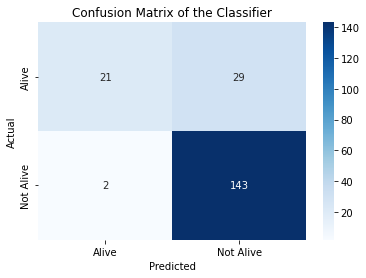

In [52]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Alive', 'Not Alive'])

In [53]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.7031


In [54]:
# zipping each feature name to its coefficient
logreg_model_values = zip(GOT_df_translated[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -59.21)
('book1_A_Game_Of_Thrones', -0.65)
('book2_A_Clash_Of_Kings', -0.72)
('book4_A_Feast_For_Crows', 1.16)
('popularity', -2.4)
('age_dob', 0.2)


In [55]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [56]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8926
Full Tree Testing ACCURACY : 0.8769
Full Tree AUC Score: 0.8321


In [57]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 37
False Positives: 13
False Negatives: 11
True Positives : 134



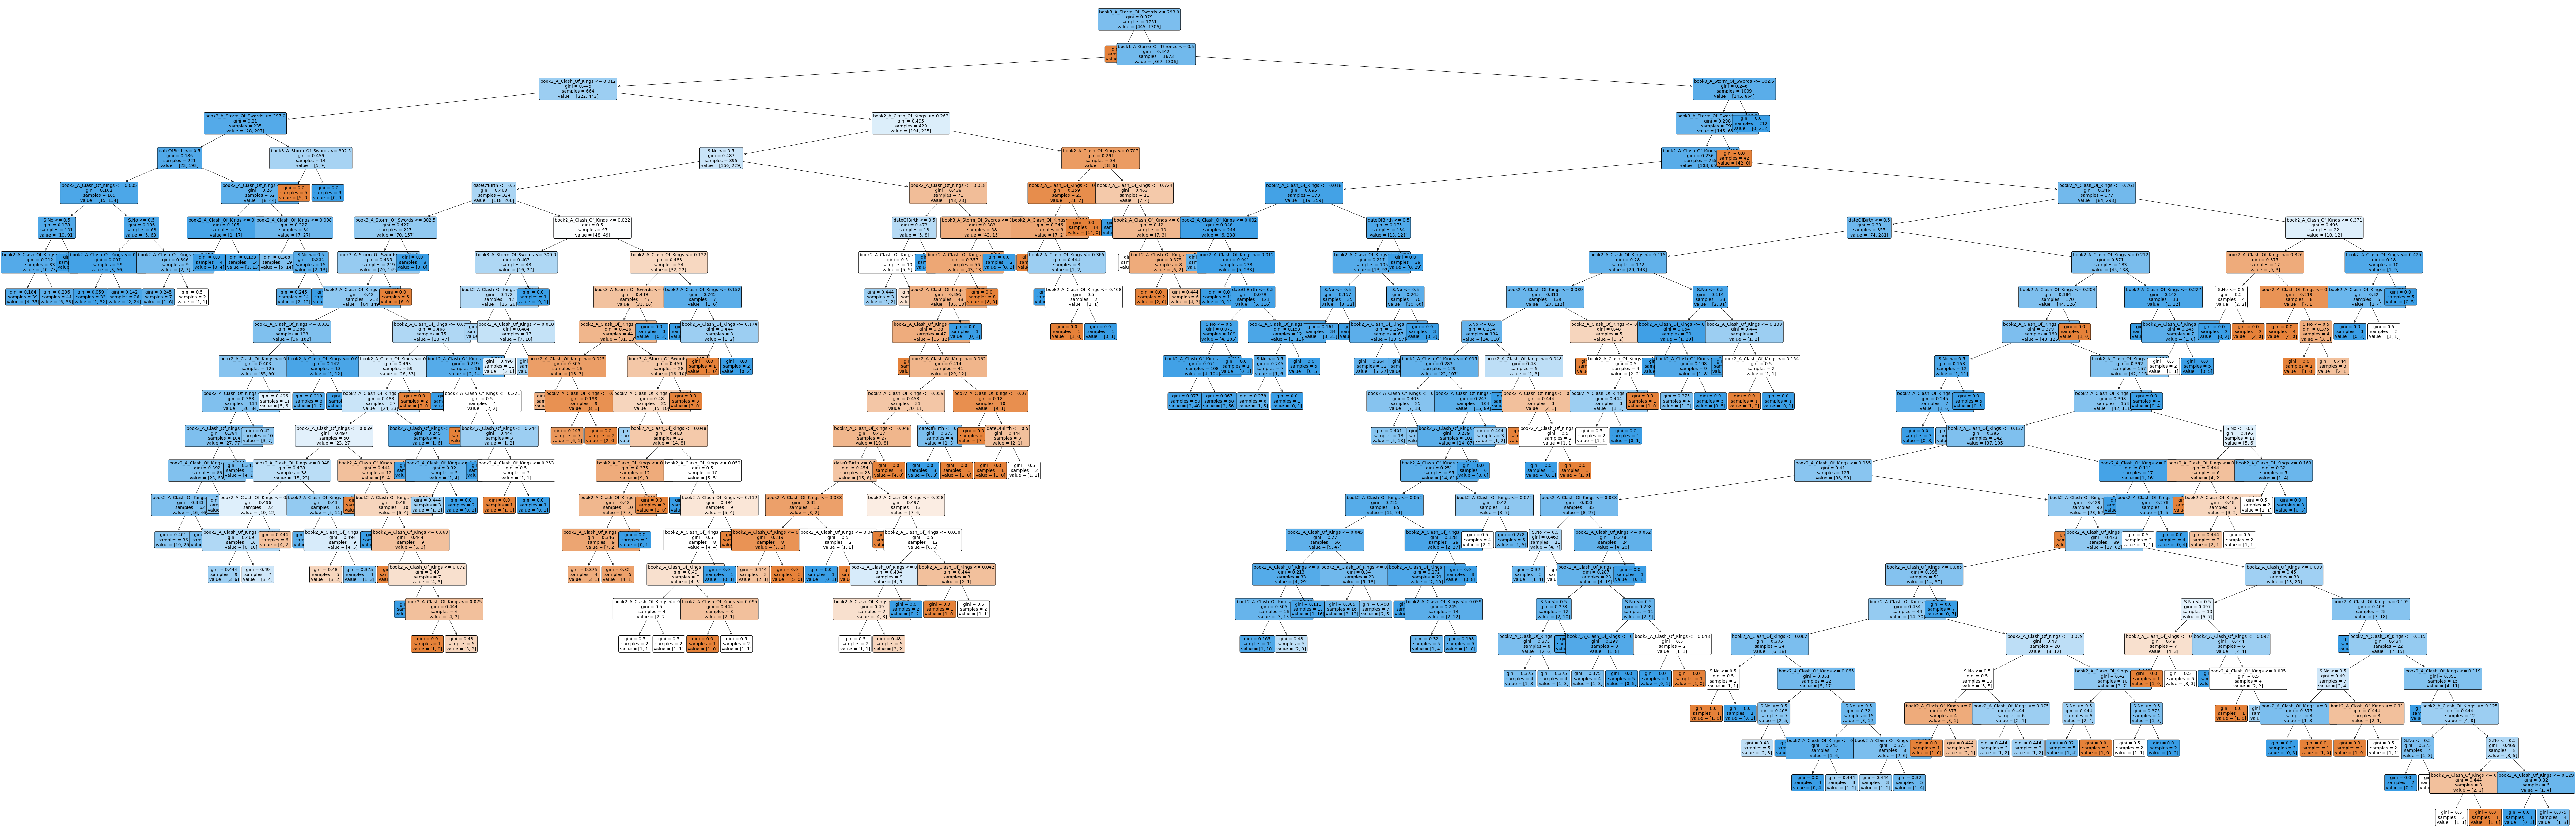

In [58]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = GOT_df_translated.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [59]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth        = 4,
                                     min_samples_leaf = 25,
                                     random_state     = 219)


# FITTING the training data
pruned_tree_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.827
Testing  ACCURACY: 0.8513
AUC Score        : 0.71


In [60]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 0
True Positives : 145



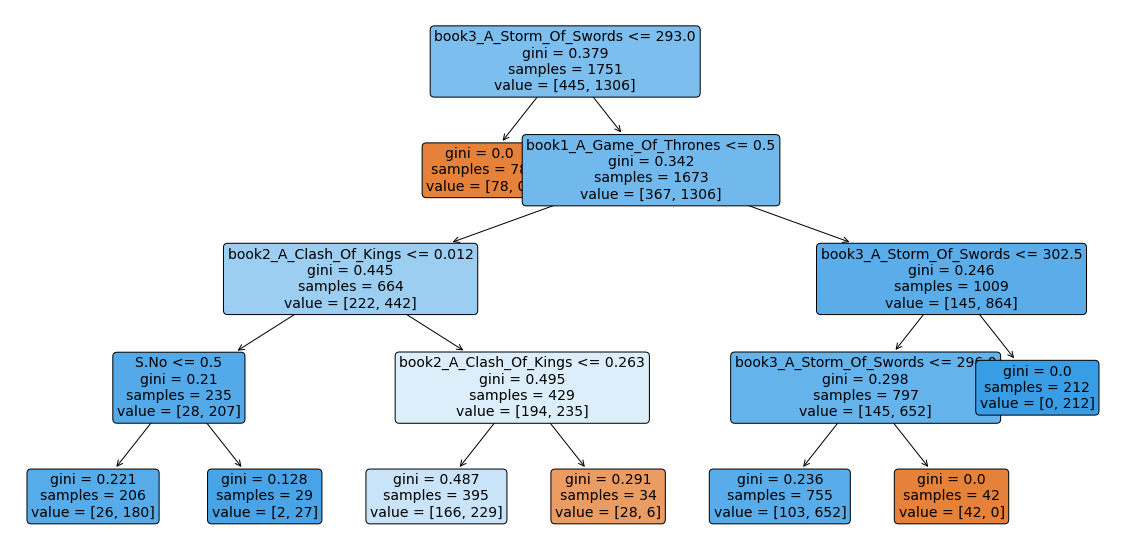

In [61]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = GOT_df_translated.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

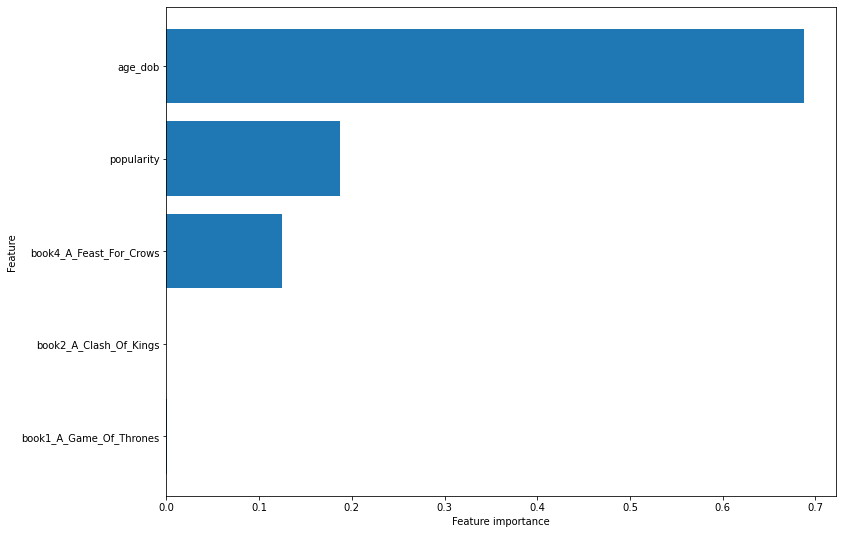

In [63]:
# plotting feature importance

import numpy as np
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

In [67]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}           {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel("/Users/kyloren/Downloads/classification_model_performance_GOT.xlsx",
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.7031         (21, 29, 2, 143)
Full Tree     0.8321         (37, 13, 11, 134)
Pruned Tree   0.71           (21, 29, 0, 145)



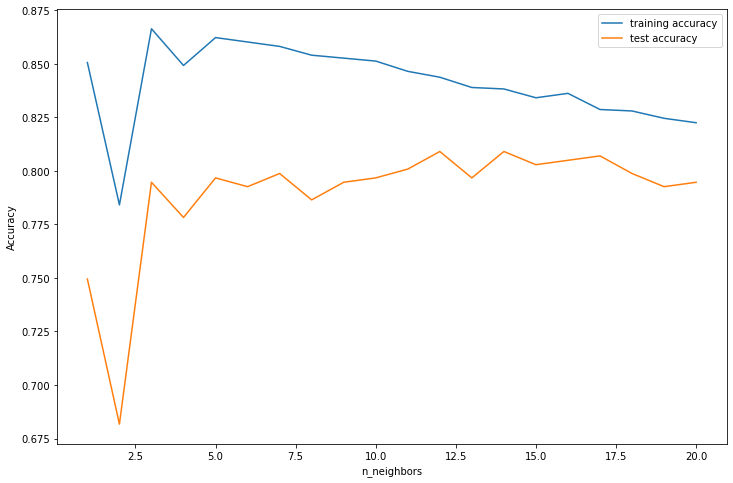

The optimal number of neighbors is: 12


In [75]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = GOT_Data,
                                  y_data        = GOT_trgt,
                                  response_type = 'class')

In [76]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(GOT_Data)


# TRANSFORMING the data
x_scaled     = scaler.transform(GOT_Data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            GOT_trgt,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_trgt)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.8378
Testing  ACCURACY: 0.8513
AUC Score        : 0.7821


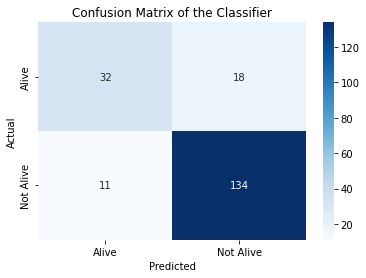

In [77]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Alive', 'Not Alive'])

In [78]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 32
False Positives: 18
False Negatives: 11
True Positives : 134



In [79]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer 

In [80]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)
#warm start lets this algorith learn from previous algorithms, its false by default

In [81]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.8018
Testing  ACCURACY: 0.841
AUC Score        : 0.7031


/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_range          = np.arange(0.1, 5.0, 0.1)
warm_start_range = [True, False]
solver_range     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_range,
              'warm_start' : warm_start_range,
              'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000) # increased for convergence


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(GOT_Data, GOT_trgt)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mode

/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py

/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: 

/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mode

/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mode

/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: 

/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mode

/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mode

Tuned Parameters  : {'warm_start': False, 'solver': 'lbfgs', 'C': 4.8}
Tuned CV AUC      : 0.6447


In [84]:
# checking the results of RandomizedSearch CV
lr_tuned_cv.cv_results_

{'mean_fit_time': array([0.09221363, 0.29655202, 0.07231935, 0.0576663 , 0.09129906,
        0.26658003, 0.09177836, 0.05849965, 0.09137789, 0.09093444,
        0.07627217, 0.20989895, 0.05095665, 0.090451  , 0.25742539,
        0.09098601, 0.06156762, 0.26956058, 0.0895466 , 0.2647047 ,
        0.06656281, 0.0624702 , 0.25644382, 0.09001565, 0.2602191 ,
        0.08961622, 0.08863298, 0.06754875, 0.08812881, 0.23216637,
        0.09011602, 0.07424593, 0.20755037, 0.22020912, 0.2272954 ,
        0.22977169, 0.24397731, 0.27015042, 0.08923562, 0.08992354,
        0.26016871, 0.07110039, 0.09047437, 0.09071438, 0.25972271,
        0.26339134, 0.06947899, 0.07057428, 0.0902133 , 0.07738074,
        0.05700922, 0.09105833, 0.09050028, 0.08920503, 0.2368803 ,
        0.09020106, 0.05959336, 0.09005268, 0.22756759, 0.2527767 ,
        0.21215312, 0.08957767, 0.08744105, 0.06693443, 0.08971802,
        0.2198619 , 0.0610346 , 0.08979201, 0.06306791, 0.06126658,
        0.05709934, 0.21914387,

In [86]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_

LogisticRegression(C=4.8, max_iter=1000, random_state=219)

In [88]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 3.9000000000000004,
                              warm_start   = True,
                              solver       = 'newton-cg',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model
lr_tuned.fit(GOT_Data, GOT_trgt)


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.8041
Testing  ACCURACY: 0.841
AUC Score        : 0.7031


In [89]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 2
True Positives : 143



In [90]:
# loading model performance
model_performance = pd.read_excel("/Users/kyloren/Downloads/classification_model_performance_GOT.xlsx")


# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0     Logistic     0.7031             0.8018            0.8410   (21, 29, 2, 143)
1    Full Tree     0.8321             0.8926            0.8769  (37, 13, 11, 134)
2  Pruned Tree     0.7100             0.8270            0.8513   (21, 29, 0, 145)
3     Tuned LR     0.7031             0.8041            0.8410   (21, 29, 2, 143)

In [94]:
# declaring a hyperparameter space
criterion_range = ['gini', 'entropy']
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 25, 1)
leaf_range      = np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(GOT_Data, GOT_trgt)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 4, 'max_depth': 17, 'criterion': 'entropy'}
Tuned Training AUC: 0.7538


In [96]:
# building a model based on hyperparameter tuning results as above

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'best',
                                    min_samples_leaf = 4,
                                    max_depth        = 17,
                                    criterion        = 'entropy',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(GOT_Data, GOT_trgt)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.8738
Testing  ACCURACY: 0.9231
AUC Score        : 0.8828


In [97]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 40
False Positives: 10
False Negatives: 5
True Positives : 140



In [98]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0     Logistic     0.7031             0.8018            0.8410   (21, 29, 2, 143)
1    Full Tree     0.8321             0.8926            0.8769  (37, 13, 11, 134)
2  Pruned Tree     0.7100             0.8270            0.8513   (21, 29, 0, 145)
3     Tuned LR     0.7031             0.8041            0.8410   (21, 29, 2, 143)
4   Tuned Tree     0.8828             0.8738            0.9231   (40, 10, 5, 140)

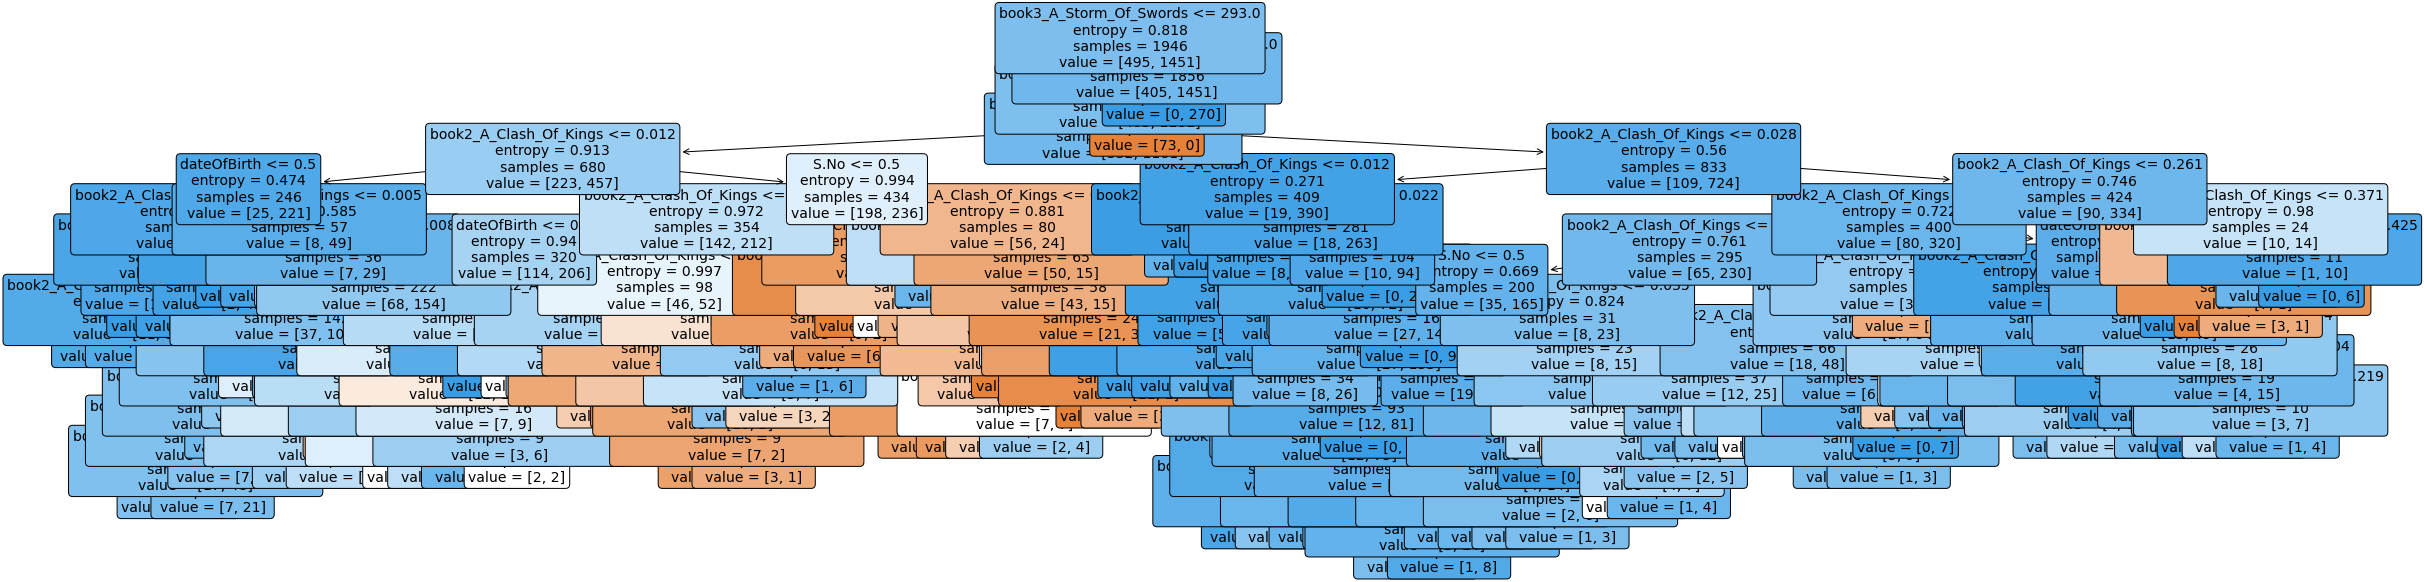

In [100]:
# setting figure size
plt.figure(figsize=(40, 10))


# developing a plotted tree
plot_tree(decision_tree = tree_tuned_fit, 
          feature_names = GOT_df_translated.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [111]:
# saving the DataFrame to Excel
model_performance.to_excel("/Users/kyloren/Downloads/classification_model_performance_GOT.xlsx",
                           index = False)

In [114]:
# new tools
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

In [115]:
# loading model performance
model_performance = pd.read_excel("/Users/kyloren/Downloads/classification_model_performance_GOT.xlsx")

In [116]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig("/Users/kyloren/Downloads/Feature_Importance_got.png")

In [119]:
# train/test split with the logit_sig variables
got_data   =  GOT_df_translated.loc[ : , candidate_dict['logit_full'] ]
got_target =  GOT_df_translated.loc[ : , 'isAlive' ]


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
                                                    GOT_Data,
                                                    GOT_trgt,
                                                    random_state = 219,
                                                    test_size    = 0.10,
                                                    stratify     = GOT_trgt
                                                   )

Random Forest

In [121]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = "gini",
                                    max_depth        = 4,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [122]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8327
Testing  ACCURACY: 0.8872
AUC Score        : 0.7866


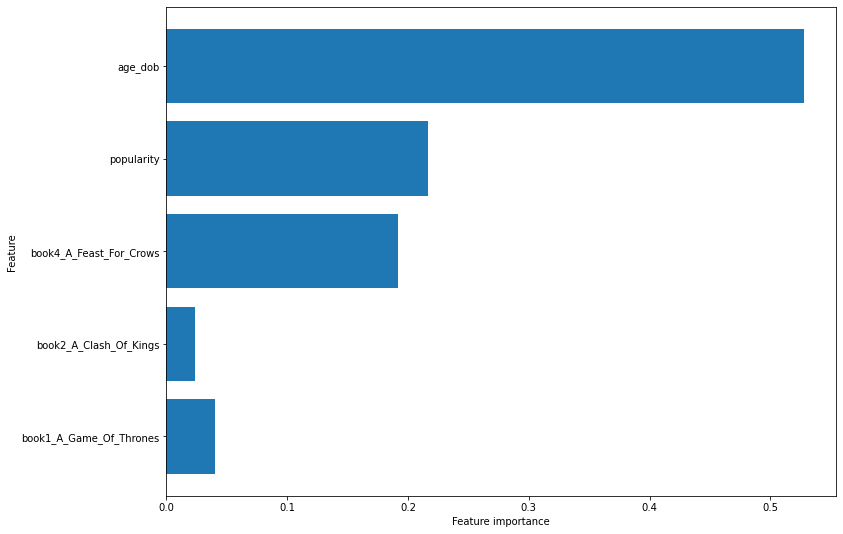

In [123]:
# plotting feature importances
plot_feature_importances(rf_default_fit, x_train, export = False)

In [124]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 1
True Positives : 144



In [125]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0              Logistic     0.7031             0.8018            0.8410   (21, 29, 2, 143)
1             Full Tree     0.8321             0.8926            0.8769  (37, 13, 11, 134)
2           Pruned Tree     0.7100             0.8270            0.8513   (21, 29, 0, 145)
3              Tuned LR     0.7031             0.8041            0.8410   (21, 29, 2, 143)
4            Tuned Tree     0.8828             0.8738            0.9231   (40, 10, 5, 140)
5  Random Forest (Full)     0.7866             0.8327            0.8872   (29, 21, 1, 144)

In [128]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_range  = np.arange(100, 1100, 250)
leaf_range       = np.arange(1, 31, 10)
criterion_range  = ['gini', 'entropy']
bootstrap_range  = [True, False]
warm_start_range = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

/Users/kyloren/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=1000. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 350, 'min_samples_leaf': 1, 'criterion': 'gini', 'bootstrap': True}
Tuned Training AUC: 0.7127


In [129]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(n_estimators=350, random_state=219, warm_start=True)

In [131]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion='gini', 
                                      min_samples_leaf=1,
                                      n_estimators=350, 
                                      random_state=219, 
                                      warm_start=True)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(GOT_Data, GOT_trgt)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8898
Forest Tuned Testing  ACCURACY: 0.9436
Forest Tuned AUC Score        : 0.9097


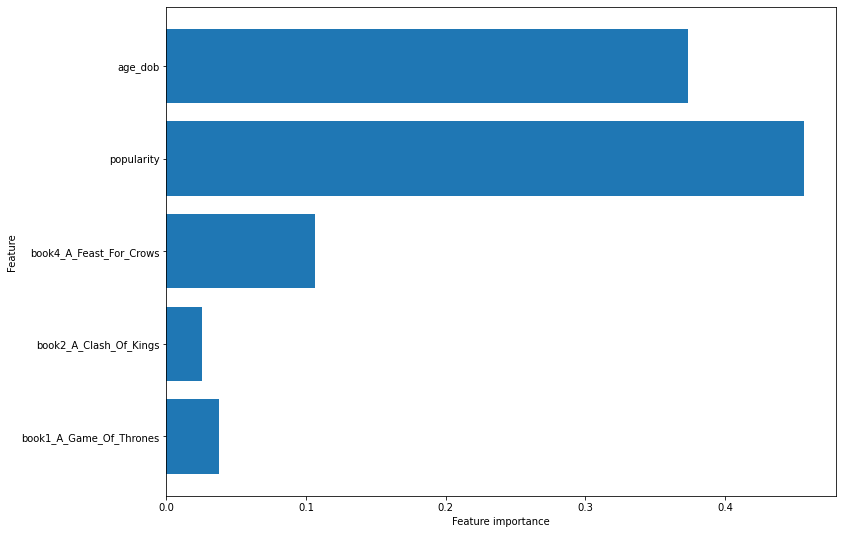

In [132]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [133]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 42
False Positives: 8
False Negatives: 3
True Positives : 142



In [134]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                    Logistic     0.7031             0.8018            0.8410   (21, 29, 2, 143)
1                   Full Tree     0.8321             0.8926            0.8769  (37, 13, 11, 134)
2                 Pruned Tree     0.7100             0.8270            0.8513   (21, 29, 0, 145)
3                    Tuned LR     0.7031             0.8041            0.8410   (21, 29, 2, 143)
4                  Tuned Tree     0.8828             0.8738            0.9231   (40, 10, 5, 140)
5        Random Forest (Full)     0.7866             0.8327            0.8872   (29, 21, 1, 144)
6  Tuned Random Forest (Full)     0.9097             0.8898            0.9436    (42, 8, 3, 142)

In [135]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8635
Testing ACCURACY : 0.8923
AUC Score        : 0.8228


In [136]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 34
False Positives: 16
False Negatives: 5
True Positives : 140



In [137]:
# SCORING the model
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                    Logistic     0.7031             0.8018            0.8410   (21, 29, 2, 143)
1                   Full Tree     0.8321             0.8926            0.8769  (37, 13, 11, 134)
2                 Pruned Tree     0.7100             0.8270            0.8513   (21, 29, 0, 145)
3                    Tuned LR     0.7031             0.8041            0.8410   (21, 29, 2, 143)
4                  Tuned Tree     0.8828             0.8738            0.9231   (40, 10, 5, 140)
5        Random Forest (Full)     0.7866             0.8327            0.8872   (29, 21, 1, 144)
6  Tuned Random Forest (Full)     0.9097             0.8898            0.9436    (42, 8, 3, 142)
7                  GBM (Full)     0.8228             0.8635            0.8923   (34, 16, 5, 140)

In [139]:
# declaring a hyperparameter space
learn_range        = np.arange(0.1,2.2,0.5)
estimator_range    = np.arange(100, 501, 25)
depth_range        = np.arange(2, 11, 2)
warm_start_range = [True, False]


# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_range,
             'max_depth'     : depth_range,
              'n_estimators'  : estimator_range,
              'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator           = full_gbm_grid,
                                 param_distributions = param_grid,
                                 cv                  = 3,
                                 n_iter              = 500,
                                 random_state        = 219,
                                 scoring             = make_scorer(roc_auc_score,
                                                       needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(GOT_Data, GOT_trgt)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'n_estimators': 125, 'max_depth': 4, 'learning_rate': 0.1}
Tuned Training AUC: 0.7543


In [140]:
# checking the best estimator for the model
full_gbm_cv.best_estimator_

GradientBoostingClassifier(max_depth=4, n_estimators=125, random_state=219)

In [142]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                       max_depth     = 2,
                                       n_estimators  = 200,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(GOT_Dataa, GOT_trgt)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.8675
Testing  ACCURACY: 0.9128
AUC Score        : 0.8497


In [143]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 36
False Positives: 14
False Negatives: 3
True Positives : 142



In [144]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                    Logistic     0.7031             0.8018            0.8410   (21, 29, 2, 143)
1                   Full Tree     0.8321             0.8926            0.8769  (37, 13, 11, 134)
2                 Pruned Tree     0.7100             0.8270            0.8513   (21, 29, 0, 145)
3                    Tuned LR     0.7031             0.8041            0.8410   (21, 29, 2, 143)
4                  Tuned Tree     0.8828             0.8738            0.9231   (40, 10, 5, 140)
5        Random Forest (Full)     0.7866             0.8327            0.8872   (29, 21, 1, 144)
6  Tuned Random Forest (Full)     0.9097             0.8898            0.9436    (42, 8, 3, 142)
7                  GBM (Full)     0.8228             0.8635            0.8923   (34, 16, 5, 140)
8                   Tuned GBM     0.8497             0.8675            0.9128   (36, 14, 3, 142)

In [145]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
6  Tuned Random Forest (Full)     0.9097             0.8898            0.9436    (42, 8, 3, 142)
4                  Tuned Tree     0.8828             0.8738            0.9231   (40, 10, 5, 140)
8                   Tuned GBM     0.8497             0.8675            0.9128   (36, 14, 3, 142)
1                   Full Tree     0.8321             0.8926            0.8769  (37, 13, 11, 134)
7                  GBM (Full)     0.8228             0.8635            0.8923   (34, 16, 5, 140)
5        Random Forest (Full)     0.7866             0.8327            0.8872   (29, 21, 1, 144)
2                 Pruned Tree     0.7100             0.8270            0.8513   (21, 29, 0, 145)
0                    Logistic     0.7031             0.8018            0.8410   (21, 29, 2, 143)
3                    Tuned LR     0.7031             0.8041            0.8410   (21, 29, 2, 143)

In [148]:
# saving the DataFrame to Excel
model_performance.to_excel("/Users/kyloren/Downloads/classification_model_performance_GOT.xlsx",
                           index = False)

In [150]:
# comparing results

print(f"""
     Model          AUC        Training     Testing       Confusion Matrix
                   Score       Accuracy     Accuracy      (TN, FP, FN, TP)
--------------   ----------   ----------   ----------   --------------------
1. Logistic        {model_performance['AUC Score'][0]}       {model_performance['Training Accuracy'][0]}       {model_performance['Testing Accuracy'][0]}        {model_performance['Confusion Matrix'][0]}
2. Full Tree       {model_performance['AUC Score'][1]}       {model_performance['Training Accuracy'][1]}       {model_performance['Testing Accuracy'][1]}       {model_performance['Confusion Matrix'][1]}
2. Pruned Tree     {model_performance['AUC Score'][2]}         {model_performance['Training Accuracy'][2]}        {model_performance['Testing Accuracy'][2]}       {model_performance['Confusion Matrix'][2]}
3. Tuned LR        {model_performance['AUC Score'][3]}       {model_performance['Training Accuracy'][3]}       {model_performance['Testing Accuracy'][3]}        {model_performance['Confusion Matrix'][3]}
4. Tuned Tree      {model_performance['AUC Score'][4]}       {model_performance['Training Accuracy'][4]}       {model_performance['Testing Accuracy'][4]}       {model_performance['Confusion Matrix'][4]}
5. Random Forest   {model_performance['AUC Score'][5]}         {model_performance['Training Accuracy'][5]}       {model_performance['Testing Accuracy'][5]}       {model_performance['Confusion Matrix'][5]}
   (Full)
6. Tuned Random    {model_performance['AUC Score'][6]}       {model_performance['Training Accuracy'][6]}       {model_performance['Testing Accuracy'][6]}       {model_performance['Confusion Matrix'][6]}
   Forest (Full)
7. GBM (Full)      {model_performance['AUC Score'][7]}       {model_performance['Training Accuracy'][7]}       {model_performance['Testing Accuracy'][7]}       {model_performance['Confusion Matrix'][7]}
8. Tuned GBM*     {model_performance['AUC Score'][8]}       {model_performance['Training Accuracy'][8]}       {model_performance['Testing Accuracy'][8]}       {model_performance['Confusion Matrix'][8]}
   *Final Model
""")


     Model          AUC        Training     Testing       Confusion Matrix
                   Score       Accuracy     Accuracy      (TN, FP, FN, TP)
--------------   ----------   ----------   ----------   --------------------
1. Logistic        0.7031       0.8018       0.841        (21, 29, 2, 143)
2. Full Tree       0.8321       0.8926       0.8769       (37, 13, 11, 134)
2. Pruned Tree     0.71         0.827        0.8513       (21, 29, 0, 145)
3. Tuned LR        0.7031       0.8041       0.841        (21, 29, 2, 143)
4. Tuned Tree      0.8828       0.8738       0.9231       (40, 10, 5, 140)
5. Random Forest   0.7866         0.8327       0.8872       (29, 21, 1, 144)
   (Full)
6. Tuned Random    0.9097       0.8898       0.9436       (42, 8, 3, 142)
   Forest (Full)
7. GBM (Full)      0.8228       0.8635       0.8923       (34, 16, 5, 140)
8. Tuned GBM*     0.8497       0.8675       0.9128       (36, 14, 3, 142)
   *Final Model

